# Payment Date Prediction 


### Importing related Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime

### Store the dataset into the Dataframe


In [ ]:
df=pd.read_csv('/content/dataset.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


### Check the shape of the dataframe


In [ ]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [ ]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [ ]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [ ]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [ ]:
df.isnull().sum()/((50000))*100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [ ]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [ ]:
df1=pd.DataFrame(df,columns=['baseline_create_date','document_create_date','document_create_date.1'])
corr=df1.corr()


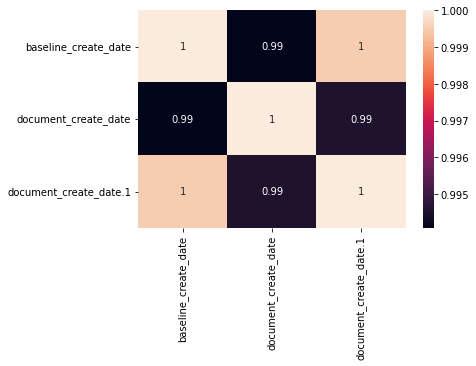

In [ ]:
sns.heatmap(corr,annot=True)

#### Please check, Column 'posting_id' is constant columns or not


#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0)
selector.fit(df[['posting_id','isOpen']])

VarianceThreshold(threshold=0)

In [ ]:
print(selector.get_support())
print('So here\n posting id does not carry 0 variance features but isOpen does.\n So posting id column is constant ')

[False  True]
So here
 posting id does not carry 0 variance features but isOpen does.
 So posting id column is constant 


In [ ]:
df.isOpen.value_counts()

0    40000
1    10000
Name: isOpen, dtype: int64

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [ ]:
df= df.drop(['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'],axis=1)

### Please check from the dataframe whether all the columns are removed or not 

In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         50000 non-null  object 
 1   cust_number           50000 non-null  object 
 2   name_customer         50000 non-null  object 
 3   clear_date            40000 non-null  object 
 4   buisness_year         50000 non-null  float64
 5   doc_id                50000 non-null  float64
 6   posting_date          50000 non-null  object 
 7   due_in_date           50000 non-null  float64
 8   invoice_currency      50000 non-null  object 
 9   total_open_amount     50000 non-null  float64
 10  baseline_create_date  50000 non-null  float64
 11  cust_payment_terms    50000 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.6+ MB


### Show all the Duplicate rows from the dataframe

In [ ]:
duplicate=df.duplicated(keep='first')
duplicate

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

### Display the Number of Duplicate Rows

In [ ]:
duplicated_rows = df[duplicate]
duplicated_rows

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Drop all the Duplicate Rows

In [ ]:
df=df.drop_duplicates(keep='first')


In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8


#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [ ]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [ ]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [ ]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [ ]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         48839 non-null  object 
 1   cust_number           48839 non-null  object 
 2   name_customer         48839 non-null  object 
 3   clear_date            39158 non-null  object 
 4   buisness_year         48839 non-null  float64
 5   doc_id                48839 non-null  float64
 6   posting_date          48839 non-null  object 
 7   due_in_date           48839 non-null  float64
 8   invoice_currency      48839 non-null  object 
 9   total_open_amount     48839 non-null  float64
 10  baseline_create_date  48839 non-null  float64
 11  cust_payment_terms    48839 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.8+ MB


### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [ ]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

In [ ]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']]

,clear_date,posting_date,due_in_date,baseline_create_date
0,2020-02-11 00:00:00,2020-01-26,20200210.0,20200126.0
1,2019-08-08 00:00:00,2019-07-22,20190811.0,20190722.0
2,2019-12-30 00:00:00,2019-09-14,20190929.0,20190914.0
3,NaN,2020-03-30,20200410.0,20200331.0
4,2019-11-25 00:00:00,2019-11-13,20191128.0,20191113.0
...,...,...,...,...
49995,NaN,2020-04-21,20200506.0,20200421.0
49996,2019-09-03 00:00:00,2019-08-15,20190830.0,20190815.0
49997,2020-03-05 00:00:00,2020-02-19,20200305.0,20200219.0
49998,2019-12-12 00:00:00,2019-11-27,20191212.0,20191127.0


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [ ]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df['posting_date']=pd.to_datetime(df['posting_date'])
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8


### Please check the datatype of all the columns after conversion of the above 4 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         48839 non-null  object        
 1   cust_number           48839 non-null  object        
 2   name_customer         48839 non-null  object        
 3   clear_date            39158 non-null  datetime64[ns]
 4   buisness_year         48839 non-null  float64       
 5   doc_id                48839 non-null  float64       
 6   posting_date          48839 non-null  datetime64[ns]
 7   due_in_date           48839 non-null  datetime64[ns]
 8   invoice_currency      48839 non-null  object        
 9   total_open_amount     48839 non-null  float64       
 10  baseline_create_date  48839 non-null  datetime64[ns]
 11  cust_payment_terms    48839 non-null  object        
dtypes: datetime64[ns](4), float64(3), object(5)
memory usage: 4.8+ MB


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [ ]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [ ]:
df['total_open_amount'].value_counts()

1897.50     101
471.56       96
1898.20      95
943.12       63
1328.25      57
           ... 
2612.50       1
4893.21       1
585.91        1
20493.12      1
1790.30       1
Name: total_open_amount, Length: 44349, dtype: int64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [ ]:
dfnew=df.groupby('invoice_currency',axis=0)
converted_usd1=dfnew.get_group('USD').total_open_amount.apply(lambda x:x).to_frame()
converted_usd2=dfnew.get_group('CAD').total_open_amount.apply(lambda x:x*0.7).to_frame()
df3=pd.concat([dfnew.get_group('USD'),dfnew.get_group('CAD')],ignore_index=True)
df4=pd.concat([converted_usd1,converted_usd2],ignore_index=True)
df3['converted_usd']=df4
df=df3
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,2253.860
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,33133.290
4,U001,0200769623,WAL-MAR in,2019-11-12,2019.0,1.930083e+09,2019-11-01,2019-11-16,USD,7358.49,2019-11-01,NAH4,7358.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,CA02,0140104472,MARTIN associates,NaT,2020.0,2.960628e+09,2020-04-17,2020-05-02,CAD,1647.36,2020-04-22,CA10,1153.152
48835,CA02,0140105508,DOLLARA systems,2019-02-28,2019.0,2.960529e+09,2019-02-15,2019-02-26,CAD,46696.50,2019-02-16,CA10,32687.550
48836,CA02,0140104440,SO foundation,2019-02-06,2019.0,2.960523e+09,2019-01-21,2019-02-02,CAD,5727.30,2019-01-23,CA10,4009.110
48837,CA02,0140104409,LOB co,NaT,2020.0,2.960631e+09,2020-04-25,2020-05-15,CAD,93386.81,2020-05-05,CA10,65370.767


### Display the new "converted_usd" column values

In [ ]:
df['converted_usd'].value_counts()

1897.500     101
471.560       96
1898.200      95
943.120       63
1328.250      57
            ... 
51938.700      1
86503.790      1
35657.440      1
72471.830      1
757.883        1
Name: converted_usd, Length: 44379, dtype: int64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [ ]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [ ]:
df=df.drop(['invoice_currency','total_open_amount'],axis=1)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
4,U001,0200769623,WAL-MAR in,2019-11-12,2019.0,1.930083e+09,2019-11-01,2019-11-16,2019-11-01,NAH4,7358.490
...,...,...,...,...,...,...,...,...,...,...,...
48834,CA02,0140104472,MARTIN associates,NaT,2020.0,2.960628e+09,2020-04-17,2020-05-02,2020-04-22,CA10,1153.152
48835,CA02,0140105508,DOLLARA systems,2019-02-28,2019.0,2.960529e+09,2019-02-15,2019-02-26,2019-02-16,CA10,32687.550
48836,CA02,0140104440,SO foundation,2019-02-06,2019.0,2.960523e+09,2019-01-21,2019-02-02,2019-01-23,CA10,4009.110
48837,CA02,0140104409,LOB co,NaT,2020.0,2.960631e+09,2020-04-25,2020-05-15,2020-05-05,CA10,65370.767


### Write a code to check the number of columns in dataframe

In [ ]:
df.shape[1]

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [ ]:
df.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

#### Find out the number of null values from the column that you got from the above code

In [ ]:
df['clear_date'].isnull().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [ ]:
main_data=df.dropna(axis=0)

### Check the number of Rows and Columns for both the dataframes 

In [ ]:
main_data.shape

(39158, 11)

In [ ]:
null_data=df[df.isnull().any(axis=1)]

In [ ]:
null_data.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [ ]:
main_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29
4,U001,0200769623,WAL-MAR in,2019-11-12,2019.0,1.930083e+09,2019-11-01,2019-11-16,2019-11-01,NAH4,7358.49


In [ ]:
null_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
5,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
8,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
12,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
13,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
20,U001,0200744019,TARG associates,NaT,2020.0,1.930676e+09,2020-03-21,2020-04-05,2020-03-21,NAA8,5893.01


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [ ]:
main_data['delay']=main_data['clear_date'] -main_data['due_in_date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
main_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days
4,U001,0200769623,WAL-MAR in,2019-11-12,2019.0,1.930083e+09,2019-11-01,2019-11-16,2019-11-01,NAH4,7358.490,-4 days
...,...,...,...,...,...,...,...,...,...,...,...,...
48831,CA02,0140104429,COSTCO co,2019-09-30,2019.0,2.960581e+09,2019-09-16,2019-09-26,2019-09-16,CA10,30507.512,4 days
48832,CA02,0140104340,COLABOR,2019-12-19,2019.0,2.960598e+09,2019-12-04,2019-12-16,2019-12-06,CA10,117054.672,3 days
48835,CA02,0140105508,DOLLARA systems,2019-02-28,2019.0,2.960529e+09,2019-02-15,2019-02-26,2019-02-16,CA10,32687.550,2 days
48836,CA02,0140104440,SO foundation,2019-02-06,2019.0,2.960523e+09,2019-01-21,2019-02-02,2019-01-23,CA10,4009.110,4 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [ ]:
main_data['avg_delay']=main_data.groupby('name_customer')['delay'].transform('mean')
main_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28,1 days,-3 days +07:08:49.779837776
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60,-3 days,19 days 00:00:00
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86,92 days,8 days 02:10:54.545454545
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29,-3 days,-3 days +19:33:27.692307693
4,U001,0200769623,WAL-MAR in,2019-11-12,2019.0,1.930083e+09,2019-11-01,2019-11-16,2019-11-01,NAH4,7358.49,-4 days,-3 days +11:31:31.525423729


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [ ]:

main_data = main_data.sort_values(by='name_customer',ascending=False)
main_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
12796,U013,0100017600,ZIYAD us,2019-08-05,2019.0,1.991825e+09,2019-05-01,2019-07-30,2019-05-01,NAUY,106067.500,6 days,6 days 00:00:00
47916,CA02,0100034823,ZARCO co,2019-05-22,2019.0,2.960548e+09,2019-05-10,2019-05-23,2019-05-13,CA10,22685.089,-1 days,-1 days +00:00:00
46773,CA02,0140106212,YEN BROS llc,2019-09-26,2019.0,2.960579e+09,2019-09-09,2019-09-28,2019-09-18,CA10,2514.253,-2 days,-2 days +00:00:00
48281,CA02,0140106212,YEN BROS corporation,2019-11-29,2019.0,2.960593e+09,2019-11-11,2019-11-30,2019-11-20,CA10,22521.604,-1 days,-1 days +12:00:00
45423,CA02,0140106212,YEN BROS corporation,2019-06-28,2019.0,2.960553e+09,2019-06-08,2019-06-28,2019-06-18,CA10,16549.400,0 days,-1 days +12:00:00


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [ ]:
main_data['avg_delay']=main_data['avg_delay'].dt.total_seconds()


In [ ]:
main_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
12796,U013,0100017600,ZIYAD us,2019-08-05,2019.0,1.991825e+09,2019-05-01,2019-07-30,2019-05-01,NAUY,106067.500,6 days,518400.0
47916,CA02,0100034823,ZARCO co,2019-05-22,2019.0,2.960548e+09,2019-05-10,2019-05-23,2019-05-13,CA10,22685.089,-1 days,-86400.0
46773,CA02,0140106212,YEN BROS llc,2019-09-26,2019.0,2.960579e+09,2019-09-09,2019-09-28,2019-09-18,CA10,2514.253,-2 days,-172800.0
48281,CA02,0140106212,YEN BROS corporation,2019-11-29,2019.0,2.960593e+09,2019-11-11,2019-11-30,2019-11-20,CA10,22521.604,-1 days,-43200.0
45423,CA02,0140106212,YEN BROS corporation,2019-06-28,2019.0,2.960553e+09,2019-06-08,2019-06-28,2019-06-18,CA10,16549.400,0 days,-43200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25730,U001,0100012638,99 CE,2020-02-24,2020.0,1.930500e+09,2020-02-07,2020-02-22,2020-02-07,NAA8,14029.460,2 days,172800.0
45077,CA02,0100027281,236008 associates,2019-11-25,2019.0,2.960594e+09,2019-11-15,2019-11-28,2019-11-18,CA10,25313.162,-3 days,-259200.0
48478,CA02,0100034821,17135 llc,2020-02-20,2020.0,2.960609e+09,2020-02-11,2020-02-23,2020-02-13,CA10,789.600,-3 days,-259200.0
45996,CA02,0100034821,17135 associates,2019-10-22,2019.0,2.960588e+09,2019-10-21,2019-11-01,2019-10-22,CA10,55802.600,-10 days,-864000.0


### Display the maindata dataframe 

In [ ]:
main_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
12796,U013,0100017600,ZIYAD us,2019-08-05,2019.0,1.991825e+09,2019-05-01,2019-07-30,2019-05-01,NAUY,106067.500,6 days,518400.0
47916,CA02,0100034823,ZARCO co,2019-05-22,2019.0,2.960548e+09,2019-05-10,2019-05-23,2019-05-13,CA10,22685.089,-1 days,-86400.0
46773,CA02,0140106212,YEN BROS llc,2019-09-26,2019.0,2.960579e+09,2019-09-09,2019-09-28,2019-09-18,CA10,2514.253,-2 days,-172800.0
48281,CA02,0140106212,YEN BROS corporation,2019-11-29,2019.0,2.960593e+09,2019-11-11,2019-11-30,2019-11-20,CA10,22521.604,-1 days,-43200.0
45423,CA02,0140106212,YEN BROS corporation,2019-06-28,2019.0,2.960553e+09,2019-06-08,2019-06-28,2019-06-18,CA10,16549.400,0 days,-43200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25730,U001,0100012638,99 CE,2020-02-24,2020.0,1.930500e+09,2020-02-07,2020-02-22,2020-02-07,NAA8,14029.460,2 days,172800.0
45077,CA02,0100027281,236008 associates,2019-11-25,2019.0,2.960594e+09,2019-11-15,2019-11-28,2019-11-18,CA10,25313.162,-3 days,-259200.0
48478,CA02,0100034821,17135 llc,2020-02-20,2020.0,2.960609e+09,2020-02-11,2020-02-23,2020-02-13,CA10,789.600,-3 days,-259200.0
45996,CA02,0100034821,17135 associates,2019-10-22,2019.0,2.960588e+09,2019-10-21,2019-11-01,2019-10-22,CA10,55802.600,-10 days,-864000.0


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [ ]:
main_data=main_data.drop(['delay','clear_date'],axis=1)

In [ ]:
main_data


,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
12796,U013,0100017600,ZIYAD us,2019.0,1.991825e+09,2019-05-01,2019-07-30,2019-05-01,NAUY,106067.500,518400.0
47916,CA02,0100034823,ZARCO co,2019.0,2.960548e+09,2019-05-10,2019-05-23,2019-05-13,CA10,22685.089,-86400.0
46773,CA02,0140106212,YEN BROS llc,2019.0,2.960579e+09,2019-09-09,2019-09-28,2019-09-18,CA10,2514.253,-172800.0
48281,CA02,0140106212,YEN BROS corporation,2019.0,2.960593e+09,2019-11-11,2019-11-30,2019-11-20,CA10,22521.604,-43200.0
45423,CA02,0140106212,YEN BROS corporation,2019.0,2.960553e+09,2019-06-08,2019-06-28,2019-06-18,CA10,16549.400,-43200.0
...,...,...,...,...,...,...,...,...,...,...,...
25730,U001,0100012638,99 CE,2020.0,1.930500e+09,2020-02-07,2020-02-22,2020-02-07,NAA8,14029.460,172800.0
45077,CA02,0100027281,236008 associates,2019.0,2.960594e+09,2019-11-15,2019-11-28,2019-11-18,CA10,25313.162,-259200.0
48478,CA02,0100034821,17135 llc,2020.0,2.960609e+09,2020-02-11,2020-02-23,2020-02-13,CA10,789.600,-259200.0
45996,CA02,0100034821,17135 associates,2019.0,2.960588e+09,2019-10-21,2019-11-01,2019-10-22,CA10,55802.600,-864000.0


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [ ]:
X=main_data.drop(['avg_delay'],axis=1)
Y=main_data[['avg_delay']]

In [ ]:
print(X.shape)
print(Y.shape)

(39158, 10)
(39158, 1)


#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [ ]:
X_train,X_loc_test,Y_train,Y_loc_test = train_test_split(X,Y,test_size=0.4,random_state=42)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_loc_test.shape)
print(Y_loc_test.shape)

(23494, 10)
(23494, 1)
(15664, 10)
(15664, 1)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [ ]:
X_val,X_test,Y_val,Y_test=train_test_split(X_loc_test,Y_loc_test,test_size=0.5,random_state=42)

### Please check for the number of rows and columns of all the 4 dataframes 

In [ ]:
print(X_val.shape)
print(X_test.shape)
print(Y_val.shape)
print(Y_test.shape)

(7832, 10)
(7832, 10)
(7832, 1)
(7832, 1)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


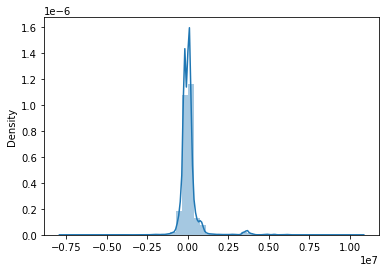

In [ ]:
sns.distplot(Y)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [ ]:
df_new=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
df_new

,name_customer,doc_id
0,11078 us,1
1,17135 llc,1
2,236008 associates,1
3,99 CE,1
4,99 CE associates,1
...,...,...
3103,YAEGER corp,1
3104,YEN BROS corp,1
3105,YEN BROS corporation,1
3106,YEN BROS llc,1


### You can make another distribution plot of the "doc_id" column from x_train

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1e-12)

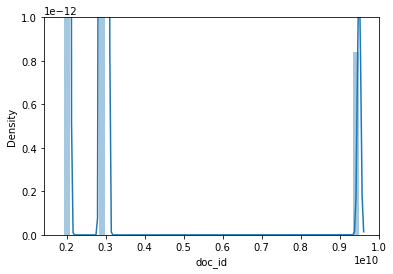

In [ ]:
sns.distplot(X_train['doc_id'])
plt.ylim(0)


#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


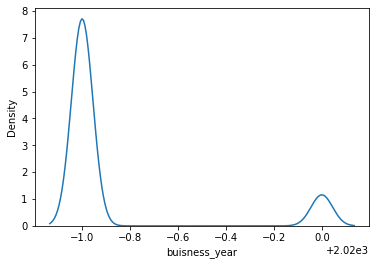

In [ ]:
sns.distplot(X_train['buisness_year'],hist=False)

              0
0      1.963333
1     -0.593952
2      0.808978
3     -0.832962
4      1.209980
...         ...
23489  0.832298
23490  0.013836
23491 -1.960127
23492 -0.137308
23493 -0.305729

[23494 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


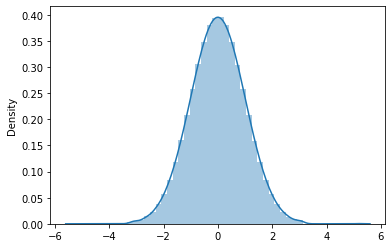

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(output_distribution='normal')
no=qt.fit_transform(X_train[['doc_id']])
dfk=pd.DataFrame(no)
print(dfk)
sns.distplot(dfk)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.0, 0.4150593045209496)

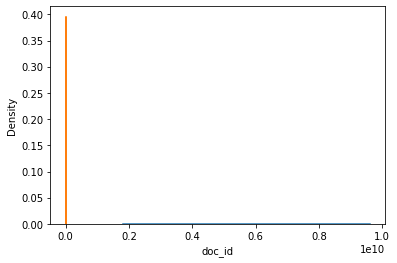

In [ ]:
sns.distplot(X_train['doc_id'])
sns.distplot(no,hist=False)
plt.ylim(0)


















# Feature Engineering 

### Display and describe the X_train dataframe 

In [ ]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.130416,2.014921e+09,30792.216012
std,0.336768,2.934335e+08,36704.495348
min,2019.000000,1.928513e+09,5.680000
25%,2019.000000,1.929183e+09,4474.850000
50%,2019.000000,1.929733e+09,16925.600000
75%,2019.000000,1.930208e+09,45385.350000
max,2020.000000,9.500000e+09,668593.360000


In [ ]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
46191,CA02,0140104508,BULK foundation,2019.0,2.960584e+09,2019-10-02,2019-10-13,2019-10-03,CA10,5717.439
32908,U001,0200148860,DOLLA in,2019.0,1.929246e+09,2019-05-04,2019-05-19,2019-05-04,NAA8,17088.000
40723,U001,0200769623,WAL-MAR trust,2020.0,1.930341e+09,2020-01-03,2020-01-18,2020-01-03,NAH4,32.360
35653,U001,0200739006,AL us,2019.0,1.929064e+09,2019-04-04,2019-04-19,2019-04-04,NAA8,19912.320
31477,U001,0200726979,BJ'S trust,2020.0,1.930542e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,486.050
...,...,...,...,...,...,...,...,...,...,...
44240,U001,0200769623,WAL-MAR corporation,2020.0,1.930357e+09,2020-01-06,2020-01-21,2020-01-06,NAH4,64036.990
13334,U001,0200778355,US co,2019.0,1.929739e+09,2019-08-13,2019-08-28,2019-08-13,NAA8,54466.440
20166,U001,0200418007,AM us,2019.0,1.928612e+09,2019-01-18,2019-02-02,2019-01-18,NAA8,847.520
18847,U001,200769623,WAL-MAR us,2019.0,1.929628e+09,2019-07-19,2019-08-03,2019-07-19,NAH4,52750.170


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [ ]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [ ]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [ ]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
46191,CA02,0
32908,U001,1
40723,U001,1
35653,U001,1
31477,U001,1
...,...,...
44240,U001,1
13334,U001,1
20166,U001,1
18847,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [ ]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [ ]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [ ]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [ ]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [ ]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [ ]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [ ]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [ ]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [ ]:
print(f"{X_train.info()}  {X_test.info()}  {X_val.info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23494 entries, 46191 to 29011
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             23494 non-null  int64         
 1   buisness_year           23494 non-null  float64       
 2   doc_id                  23494 non-null  float64       
 3   posting_date            23494 non-null  datetime64[ns]
 4   due_in_date             23494 non-null  datetime64[ns]
 5   baseline_create_date    23494 non-null  datetime64[ns]
 6   converted_usd           23494 non-null  float64       
 7   business_code_enc       23494 non-null  int64         
 8   name_customer_enc       23494 non-null  int64         
 9   cust_payment_terms_enc  23494 non-null  int64         
dtypes: datetime64[ns](3), float64(3), int64(4)
memory usage: 2.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 28284 to 33953
Data columns (total

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [ ]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [ ]:
X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [ ]:
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year


X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [ ]:
print(f"{X_train.dtypes}  {X_test.dtypes}  {X_val.dtypes}")

cust_number                        int64
buisness_year                    float64
doc_id                           float64
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_baseline_create_date        int64
month_of_baseline_create_date      int64
year_of_baseline_create_date       int64
day_of_due_in_date                 int64
month_of_due_in_date               int64
year_of_due_in_date                int64
dtype: object  cust_number                        int64
buisness_year                    float64
doc_id                           float64
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
day_of_postingdate                 int64
m

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [ ]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [ ]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [ ]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [ ]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [ ]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['year_of_postingdate',
 'month_of_due_in_date',
 'year_of_due_in_date',
 'year_of_baseline_create_date',
 'month_of_baseline_create_date',
 'day_of_baseline_create_date']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

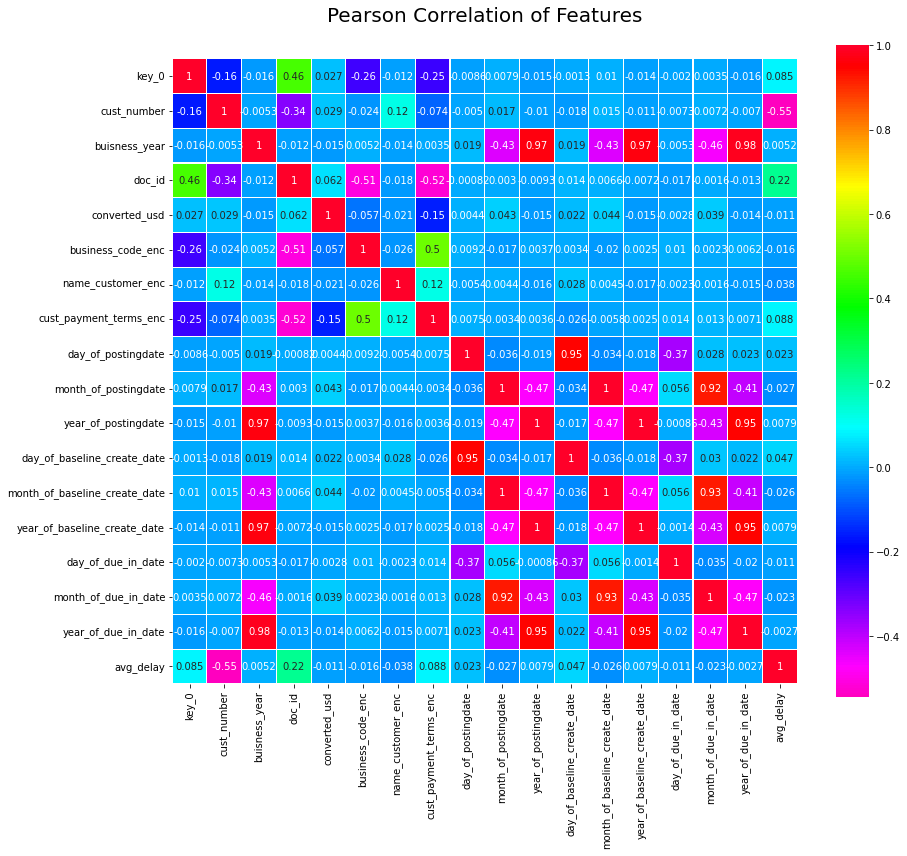

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [ ]:
sel.variances_

array([1.78240248e+15, 1.13407871e-01, 8.60995289e+16, 1.34716264e+09,
       2.79278804e-01, 1.07947586e+06, 1.20393007e+02, 7.56369758e+01,
       1.22352317e+01, 1.13900371e-01, 7.71204400e+01, 1.22460341e+01,
       1.14028799e-01, 7.64023131e+01, 1.20645714e+01, 1.16395030e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(Y_val, predict_test, squared=False)

536180.7293880726

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[309463684230.49084],[0.32710689817674],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regressor')
svr =SVR()
svr.fit(X_train,Y_train)
svr_predicted= svr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(Y_test, svr_predicted))
R2_Score.append(r2_score(Y_test, svr_predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test2= svr.predict(X_val)
mean_squared_error(Y_val, predict_test2, squared=False)

645810.6248612133

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor'],[309463684230.49084, 462614858675.3314],[0.32710689817674, -0.005902673128267422],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regressor')
dtr =DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
dtr_predicted= dtr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(Y_test, dtr_predicted))
R2_Score.append(r2_score(Y_test, dtr_predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test3= dtr.predict(X_val)
mean_squared_error(Y_val, predict_test3, squared=False)

506735.4714014291

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor'],[309463684230.49084, 462614858675.3314, 229462452792.33652],[0.32710689817674, -0.005902673128267422, 0.501060352217588],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
rfr =RandomForestRegressor()
rfr.fit(X_train,Y_train)
rfr_predicted= svr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(Y_test, rfr_predicted))
R2_Score.append(r2_score(Y_test, rfr_predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test4= rfr.predict(X_val)
mean_squared_error(Y_val, predict_test4, squared=False)

345236.5438536717

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor'],[309463684230.49084, 462614858675.3314, 229462452792.33652, 462614858675.3314],[0.32710689817674, -0.005902673128267422, 0.501060352217588, -0.005902673128267422],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [ ]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor2 = xgb.XGBRegressor()
regressor2.fit(X_train, Y_train)
xgb_predicted = regressor2.predict(X_test)

[12:11:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(Y_test, xgb_predicted))
R2_Score.append(r2_score(Y_test, xgb_predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test5= regressor2.predict(X_val)
mean_squared_error(Y_val, predict_test5, squared=False)

377263.2873607911

### Display The Comparison Lists


In [ ]:

listed=[]
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')
    listed.append(i)

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[309463684230.49084, 462614858675.3314, 229462452792.33652, 462614858675.3314, 126302270011.47188],[0.32710689817674, -0.005902673128267422, 0.501060352217588, -0.005902673128267422, 0.7253702758478162],

## You need to make the comparison list into a comparison dataframe 

In [ ]:
comp_df = pd.DataFrame(listed).T

In [ ]:
comp_df.rename(columns={0 : 'Algorithm' , 1 : 'MSE_Score', 2 : 'R2_Score'})

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,309463684230.490845,0.327107
1,Support Vector Regressor,462614858675.331421,-0.005903
2,Decision Tree Regressor,229462452792.336517,0.50106
3,Random Forest Regressor,462614858675.331421,-0.005903
4,XGB Regressor,126302270011.471878,0.72537


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, Y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

[12:11:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
mean_squared_error(Y_test,predictedfinal,squared=False)

355390.30658062676

### Calculate the mean Square Error for validation dataset

In [ ]:
mean_squared_error(Y_val,predict_testfinal,squared=False)

377263.2873607911

### Calculate the R2 score for test

In [ ]:
r2_score(Y_test, predictedfinal)

0.7253702758478162

### Calculate the R2 score for Validation

In [ ]:
r2_score(Y_val, predict_testfinal)

0.656497072419361

### Calculate the Accuracy for train Dataset 

In [ ]:
r2_score1 = regressorfinal.score(X_train,Y_train)
print(' Accuracy for train dataset = ',r2_score1*100,'%')

 Accuracy for train dataset =  74.56266450502171 %


### Calculate the accuracy for validation

In [ ]:
r2_score2 = regressorfinal.score(X_val,Y_val)
print(' Accuracy for train dataset = ',r2_score2*100,'%')

 Accuracy for train dataset =  65.6497072419361 %


### Calculate the accuracy for test

In [ ]:
r2_score2 = regressorfinal.score(X_test,Y_test)
print(' Accuracy for train dataset = ',r2_score2*100,'%')

 Accuracy for train dataset =  72.53702758478163 %


## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [ ]:
null_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
5,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
8,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.590
12,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
13,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060
20,U001,0200744019,TARG associates,NaT,2020.0,1.930676e+09,2020-03-21,2020-04-05,2020-03-21,NAA8,5893.010
...,...,...,...,...,...,...,...,...,...,...,...
48809,CA02,0140104440,SO corporation,NaT,2020.0,2.960622e+09,2020-03-16,2020-03-28,2020-03-18,CA10,42516.719
48830,CA02,0140104472,MARTIN llc,NaT,2020.0,2.960618e+09,2020-03-04,2020-03-16,2020-03-06,CA10,21149.100
48833,CA02,140106408,WAL-M associates,NaT,2020.0,2.960628e+09,2020-04-12,2020-04-22,2020-04-12,CA10,5978.266
48834,CA02,0140104472,MARTIN associates,NaT,2020.0,2.960628e+09,2020-04-17,2020-05-02,2020-04-22,CA10,1153.152


### Check for the number of rows and columns in the nulldata

In [ ]:
print('number of rows : ' , null_data.shape[0])
print('number of columns : ' , null_data.shape[1])

number of rows :  9681
number of columns :  11


### Check the Description and Information of the nulldata 

In [ ]:
print(null_data.describe())
print(null_data.info())

       buisness_year        doc_id  converted_usd
count         9681.0  9.681000e+03    9681.000000
mean          2020.0  2.006165e+09   32065.681125
std              0.0  2.673629e+08   35419.613688
min           2020.0  1.930535e+09       0.720000
25%           2020.0  1.930658e+09    5607.190000
50%           2020.0  1.930731e+09   19024.190000
75%           2020.0  1.930818e+09   47752.640000
max           2020.0  2.960636e+09  653644.800000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 5 to 48837
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-

### Storing the Nulldata into a different dataset 
# for BACKUP

In [ ]:
null_data2 = null_data

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(null_data['business_code'])
null_data['business_code_enc'] = business_codern.transform(null_data['business_code'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
null_data['cust_number'] = null_data['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [ ]:
null_data['day_of_due_in_date'] = null_data['due_in_date'].dt.day
null_data['month_of_due_in_date'] = null_data['due_in_date'].dt.month
null_data['year_of_due_in_date'] = null_data['due_in_date'].dt.year

null_data['day_of_postingdate'] = null_data['posting_date'].dt.day
null_data['month_of_postingdate'] = null_data['posting_date'].dt.month
null_data['year_of_postingdate'] = null_data['posting_date'].dt.year

null_data['day_of_cleardate'] = null_data['clear_date'].dt.day
null_data['month_of_cleardate'] = null_data['clear_date'].dt.month
null_data['year_of_cleardate'] = null_data['clear_date'].dt.year

null_data['day_of_baseline_create_date'] = null_data['baseline_create_date'].dt.day
null_data['month_of_baseline_create_date'] = null_data['baseline_create_date'].dt.month
null_data['year_of_baseline_create_date'] = null_data['baseline_create_date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
null_data['cust_payment_terms_enc']=label_encoder1.transform(null_data['cust_payment_terms'])
null_data['business_code_enc']=label_encoder1.transform(null_data['business_code'])
null_data['name_customer_enc']=label_encoder.transform(null_data['name_customer'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Check for the datatypes of all the columns of Nulldata

In [ ]:
null_data.dtypes

business_code                            object
cust_number                               int64
name_customer                            object
clear_date                       datetime64[ns]
buisness_year                           float64
doc_id                                  float64
posting_date                     datetime64[ns]
due_in_date                      datetime64[ns]
baseline_create_date             datetime64[ns]
cust_payment_terms                       object
converted_usd                           float64
business_code_enc                         int64
day_of_due_in_date                        int64
month_of_due_in_date                      int64
year_of_due_in_date                       int64
day_of_postingdate                        int64
month_of_postingdate                      int64
year_of_postingdate                       int64
day_of_cleardate                        float64
month_of_cleardate                      float64
year_of_cleardate                       

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [ ]:
null_data=null_data.drop(['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate'],axis = 1)

### Check the information of the "nulldata" dataframe

In [ ]:
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 5 to 48837
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_number                    9681 non-null   int64  
 1   buisness_year                  9681 non-null   float64
 2   doc_id                         9681 non-null   float64
 3   converted_usd                  9681 non-null   float64
 4   business_code_enc              9681 non-null   int64  
 5   day_of_due_in_date             9681 non-null   int64  
 6   month_of_due_in_date           9681 non-null   int64  
 7   year_of_due_in_date            9681 non-null   int64  
 8   day_of_postingdate             9681 non-null   int64  
 9   month_of_postingdate           9681 non-null   int64  
 10  year_of_postingdate            9681 non-null   int64  
 11  day_of_baseline_create_date    9681 non-null   int64  
 12  month_of_baseline_create_date  9681 non-null   

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 28284 to 33953
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_number                    7832 non-null   int64  
 1   buisness_year                  7832 non-null   float64
 2   doc_id                         7832 non-null   float64
 3   converted_usd                  7832 non-null   float64
 4   business_code_enc              7832 non-null   int64  
 5   name_customer_enc              7832 non-null   int64  
 6   cust_payment_terms_enc         7832 non-null   int64  
 7   day_of_postingdate             7832 non-null   int64  
 8   month_of_postingdate           7832 non-null   int64  
 9   year_of_postingdate            7832 non-null   int64  
 10  day_of_baseline_create_date    7832 non-null   int64  
 11  month_of_baseline_create_date  7832 non-null   int64  
 12  year_of_baseline_create_date   7832 non-nul

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [ ]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baseline_create_date', 'month_of_baseline_create_date',
       'year_of_baseline_create_date', 'day_of_due_in_date',
       'month_of_due_in_date', 'year_of_due_in_date'],
      dtype='object')

In [ ]:
null_data.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_due_in_date', 'month_of_due_in_date',
       'year_of_due_in_date', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [ ]:
nulldata3=null_data[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baseline_create_date', 'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'day_of_due_in_date', 'month_of_due_in_date', 'year_of_due_in_date']]

### Display the Final Dataset

In [ ]:
nulldata3

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date
5,200744019,2020.0,1.930659e+09,11173.020,63,2804,20,19,3,2020,19,3,2020,3,4,2020
8,200418007,2020.0,1.930611e+09,3525.590,63,96,20,11,3,2020,11,3,2020,26,3,2020
12,200739534,2020.0,1.930788e+09,121105.650,63,2023,20,15,4,2020,15,4,2020,30,4,2020
13,200353024,2020.0,1.930817e+09,3726.060,63,717,35,23,4,2020,16,4,2020,26,4,2020
20,200744019,2020.0,1.930676e+09,5893.010,63,2795,20,21,3,2020,21,3,2020,5,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48809,140104440,2020.0,2.960622e+09,42516.719,63,2557,5,16,3,2020,18,3,2020,28,3,2020
48830,140104472,2020.0,2.960618e+09,21149.100,63,1763,5,4,3,2020,6,3,2020,16,3,2020
48833,140106408,2020.0,2.960628e+09,5978.266,63,2994,5,12,4,2020,12,4,2020,22,4,2020
48834,140104472,2020.0,2.960628e+09,1153.152,63,2929,5,17,4,2020,22,4,2020,2,5,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [ ]:
final_result=regressorfinal.predict (nulldata3)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [ ]:
final_result

0       330995.812500
1       144505.343750
2       119277.304688
3      -274251.781250
4       253839.390625
            ...      
9676    402490.656250
9677    315225.843750
9678    901419.500000
9679    959129.937500
9680    256799.781250
Name: avg_delay, Length: 9681, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
null_data2.reset_index(drop=True,inplace=True)
Final = null_data2.merge(final_result , on = nulldata3.index )

### Display the "Final" dataframe 

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,...,year_of_postingdate,day_of_cleardate,month_of_cleardate,year_of_cleardate,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,cust_payment_terms_enc,name_customer_enc,avg_delay
0,5,U001,200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,...,2020,NaN,NaN,NaN,19,3,2020,20,2804,330995.812500
1,8,U001,200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,...,2020,NaN,NaN,NaN,11,3,2020,20,96,144505.343750
2,12,U001,200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,...,2020,NaN,NaN,NaN,15,4,2020,20,2023,119277.304688
3,13,U001,200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,...,2020,NaN,NaN,NaN,16,4,2020,35,717,-274251.781250
4,20,U001,200744019,TARG associates,NaT,2020.0,1.930676e+09,2020-03-21,2020-04-05,2020-03-21,...,2020,NaN,NaN,NaN,21,3,2020,20,2795,253839.390625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,48809,CA02,140104440,SO corporation,NaT,2020.0,2.960622e+09,2020-03-16,2020-03-28,2020-03-18,...,2020,NaN,NaN,NaN,18,3,2020,5,2557,402490.656250
9677,48830,CA02,140104472,MARTIN llc,NaT,2020.0,2.960618e+09,2020-03-04,2020-03-16,2020-03-06,...,2020,NaN,NaN,NaN,6,3,2020,5,1763,315225.843750
9678,48833,CA02,140106408,WAL-M associates,NaT,2020.0,2.960628e+09,2020-04-12,2020-04-22,2020-04-12,...,2020,NaN,NaN,NaN,12,4,2020,5,2994,901419.500000
9679,48834,CA02,140104472,MARTIN associates,NaT,2020.0,2.960628e+09,2020-04-17,2020-05-02,2020-04-22,...,2020,NaN,NaN,NaN,22,4,2020,5,2929,959129.937500


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [ ]:
Final.shape

(9681, 28)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [ ]:
Final['clear_date']

0      2020-04-06 19:56:35.812500000
1      2020-03-27 16:08:25.343750000
2      2020-05-01 09:07:57.304687500
3      2020-04-22 19:49:08.218750000
4      2020-04-07 22:30:39.390625000
                    ...             
9676   2020-04-01 15:48:10.656250000
9677   2020-03-19 15:33:45.843750000
9678   2020-05-02 10:23:39.500000000
9679   2020-05-13 02:25:29.937500000
9680   2020-05-17 23:19:59.781250000
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [ ]:
Final['avg_delay'].value_counts()

 0.0     4145
 1.0     2406
 3.0      764
 2.0      589
-4.0      516
-1.0      231
 4.0      158
 7.0      140
 10.0     106
 6.0      104
-2.0      103
 8.0       95
-3.0       92
 41.0      60
 5.0       36
 9.0       30
 11.0      25
-5.0       19
 16.0       9
 24.0       8
 20.0       7
 17.0       6
 40.0       5
 19.0       4
-6.0        4
 45.0       4
 35.0       3
 23.0       3
 25.0       2
 14.0       2
-7.0        1
 42.0       1
 21.0       1
-9.0        1
 12.0       1
Name: avg_delay, dtype: int64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:

bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [ ]:
Final= Final.drop(['key_0','avg_delay'],axis=1)

### Display the count of each categoty of new "Aging Bucket" column 

In [ ]:
Final['Aging Bucket'].value_counts()

0-15               8601
31-45                69
16-30                40
46-60                 4
Greatar than 60       0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [ ]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,...,year_of_postingdate,day_of_cleardate,month_of_cleardate,year_of_cleardate,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,cust_payment_terms_enc,name_customer_enc,Aging Bucket
0,U001,200744019,TARG us,2020-04-06 19:56:35.812500000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,...,2020,NaN,NaN,NaN,19,3,2020,20,2804,0-15
1,U001,200418007,AM,2020-03-27 16:08:25.343750000,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,...,2020,NaN,NaN,NaN,11,3,2020,20,96,0-15
2,U001,200739534,OK systems,2020-05-01 09:07:57.304687500,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,...,2020,NaN,NaN,NaN,15,4,2020,20,2023,0-15
3,U001,200353024,DECA corporation,2020-04-22 19:49:08.218750000,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,...,2020,NaN,NaN,NaN,16,4,2020,35,717,NaN
4,U001,200744019,TARG associates,2020-04-07 22:30:39.390625000,2020.0,1.930676e+09,2020-03-21,2020-04-05,2020-03-21,NAA8,...,2020,NaN,NaN,NaN,21,3,2020,20,2795,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,CA02,140104440,SO corporation,2020-04-01 15:48:10.656250000,2020.0,2.960622e+09,2020-03-16,2020-03-28,2020-03-18,CA10,...,2020,NaN,NaN,NaN,18,3,2020,5,2557,0-15
9677,CA02,140104472,MARTIN llc,2020-03-19 15:33:45.843750000,2020.0,2.960618e+09,2020-03-04,2020-03-16,2020-03-06,CA10,...,2020,NaN,NaN,NaN,6,3,2020,5,1763,0-15
9678,CA02,140106408,WAL-M associates,2020-05-02 10:23:39.500000000,2020.0,2.960628e+09,2020-04-12,2020-04-22,2020-04-12,CA10,...,2020,NaN,NaN,NaN,12,4,2020,5,2994,0-15
9679,CA02,140104472,MARTIN associates,2020-05-13 02:25:29.937500000,2020.0,2.960628e+09,2020-04-17,2020-05-02,2020-04-22,CA10,...,2020,NaN,NaN,NaN,22,4,2020,5,2929,0-15


### Store this dataframe into the .csv format

In [ ]:
Final.to_csv('Final_data.csv', index=False)

# END OF THE PROJECT